In [75]:
import requests

In [76]:
response = requests.get("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
# Querying a style with raster layers returns a JPEG
# and save the output as a JPEG image
# Retrieve a map at 72.873722 longitude, 19.211453 latitude, zoom 10.
# Bearing and pitch default to 0
# and save the output as a PNG image.

In [77]:
dark = requests.get("https://api.mapbox.com/styles/v1/mapbox/dark-v10/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
light = requests.get("https://api.mapbox.com/styles/v1/mapbox/light-v10/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
street = requests.get("https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
satellite = requests.get("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
street_old = requests.get("https://api.mapbox.com/styles/v1/mapbox/streets-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
satellite_new = requests.get("https://api.mapbox.com/styles/v1/mapbox/satellite-streets-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")


In [78]:
# print request object
print(response.url)
print(dark.url)

  
# print status code
print(response.status_code)
print(dark.status_code)
print(light.status_code)
print(street.status_code)
print(satellite.status_code)
print(street_old.status_code)
print(satellite_new.status_code)


https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/72.861557,19.212009,15/600x600?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q
https://api.mapbox.com/styles/v1/mapbox/dark-v10/static/72.861557,19.212009,15/600x600?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q
200
200
200
200
200
200
200


In [79]:
file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/dark.tiff", "wb")
file.write(dark.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/light.tiff", "wb")
file.write(light.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street.tiff", "wb")
file.write(street.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite.tiff", "wb")
file.write(satellite.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample.tiff", "wb")
file.write(response.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street_old.tiff", "wb")
file.write(street_old.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite_new.tiff", "wb")
file.write(satellite_new.content)
file.close()

In [80]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
import xarray as xr
import rioxarray as rxr

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [81]:
%pwd
%ls

 Untitled.ipynb   sample_image.jpg   'test 2.ipynb'
 manage.py*       sample_image.png   'test application.ipynb'
 maps/            sample_image.tiff
 project/         sundarbans_data/


In [82]:
print('Check files ?:')
for name in glob('/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample_image.tiff'):
    print(name)

Check files ?:


In [83]:
S_sentinel_bands = glob(r"/home/karan/Remote-vegetation-sensing/project/sundarbans_data/*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/home/karan/Remote-vegetation-sensing/project/sundarbans_data/dark.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/light.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite_new.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street_old.tiff']

In [84]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

/home/karan/.local/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [85]:
arr_st = np.stack(l)

In [86]:
arr_st.shape

(7, 600, 600)

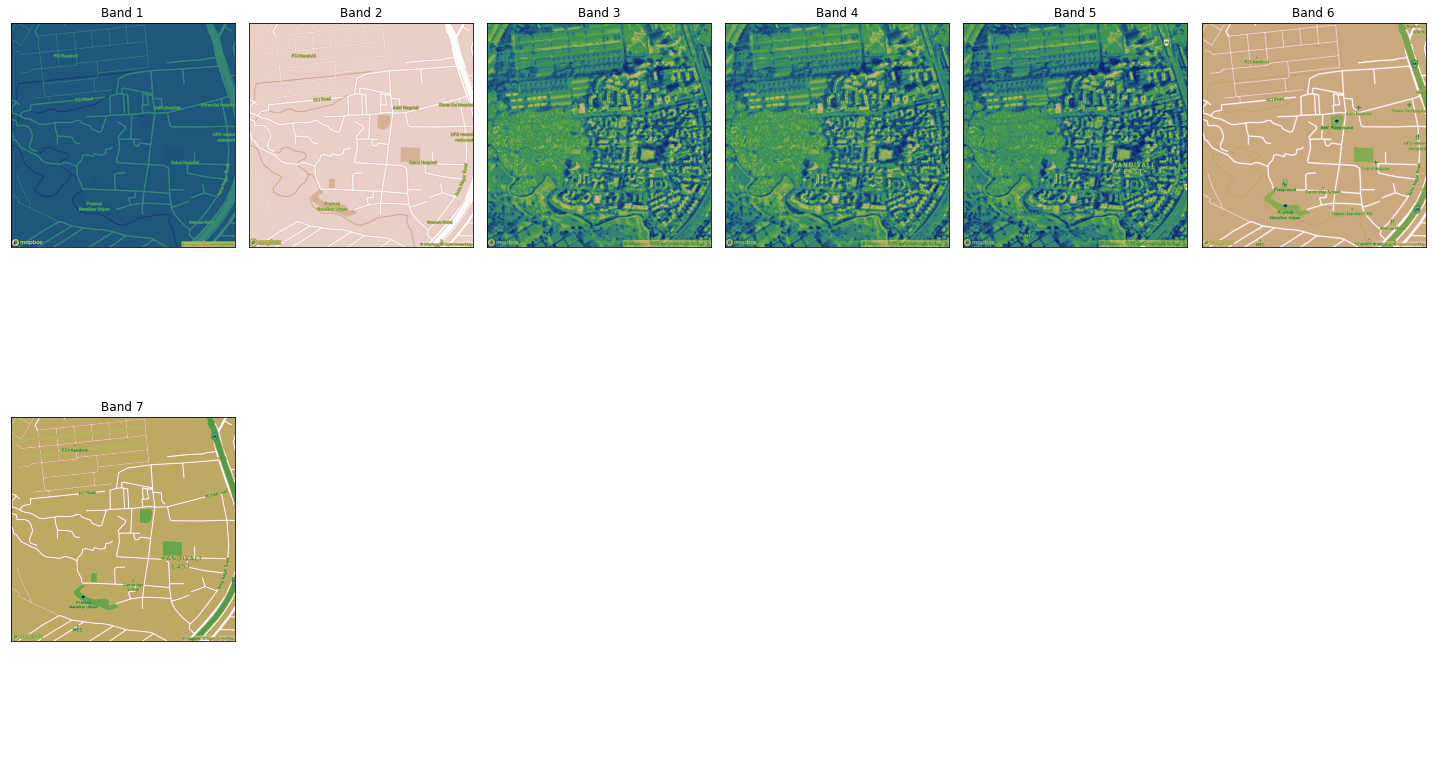

In [87]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

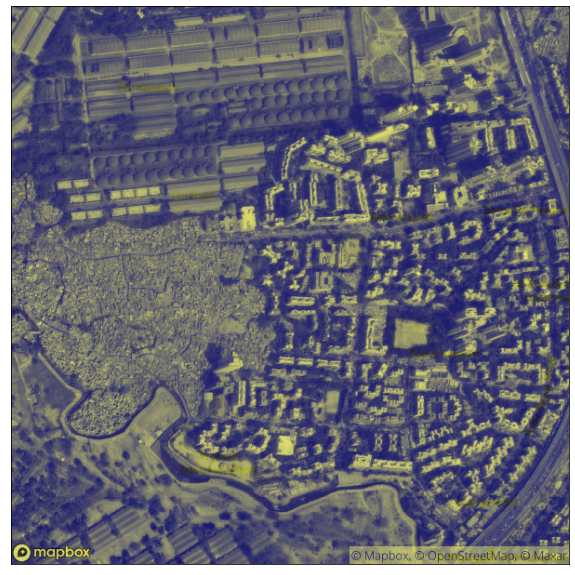

In [88]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

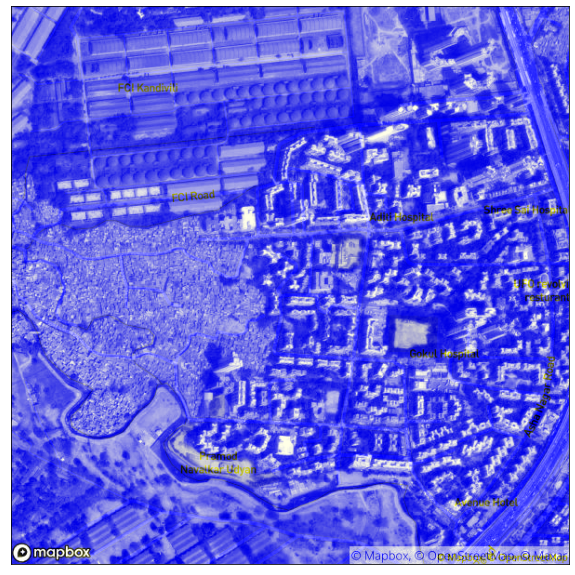

In [89]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

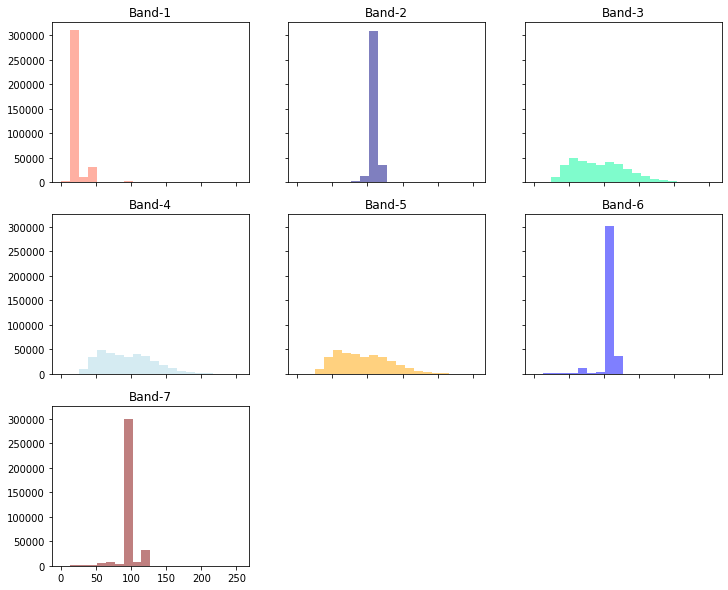

In [90]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

/home/karan/.local/lib/python3.8/site-packages/earthpy/spatial.py:109: Warning: Divide by zero produced infinity values that will be replaced with nan values
  warnings.warn(


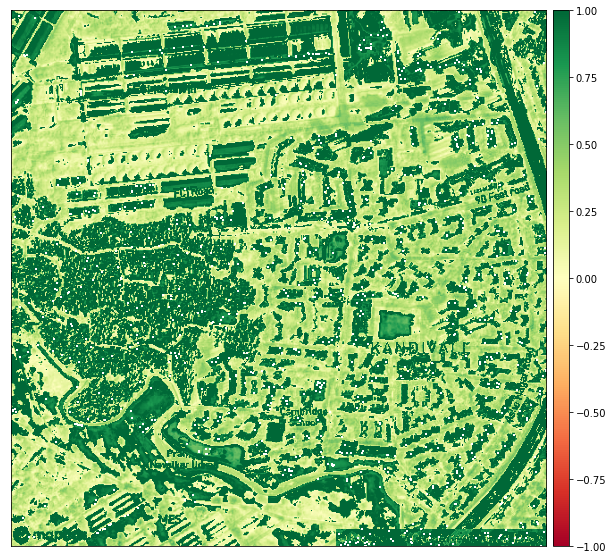

In [91]:
ndvi = es.normalized_diff(arr_st[6], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 16))

plt.show()

In [92]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [93]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(S_sentinel_bands):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
all_bands[i]["band"]=i+1

/home/karan/.local/lib/python3.8/site-packages/rioxarray/_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
/home/karan/.local/lib/python3.8/site-packages/rioxarray/_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
/home/karan/.local/lib/python3.8/site-packages/rioxarray/_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
/home/karan/.local/lib/python3.8/site-packages/rioxarray/_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
/home/karan/.local/lib/python3.8/site-pa

In [99]:
landsat_post_fire_xr = xr.concat(all_bands, dim="band") 
landsat_post_fire_xr

ERROR 1: Unexpected image dimension (600 x 600), where as (298 x 954) was expected
Warning 1: libjpeg: Application transferred too many scanlines (this warning can be turned as an error by setting GDAL_ERROR_ON_LIBJPEG_WARNING to TRUE)


<xarray.DataArray (y: 954, x: 600, band: 13)>
array([[[ 23., 109., 105., ...,  78., 105.,  96.],
        [ 23., 109., 105., ...,  79., 105.,  96.],
        [ 23., 109.,  89., ...,  67., 105.,  96.],
        ...,
        [ 23., 109.,  nan, ..., 115., 105.,  96.],
        [ 23., 109.,  nan, ..., 103., 105.,  96.],
        [ 23., 109.,  nan, ...,  90., 105.,  96.]],

       [[ 23., 109., 115., ...,  84., 105.,  96.],
        [ 23., 109., 120., ...,  91., 105.,  96.],
        [ 23., 109., 116., ...,  90., 105.,  96.],
        ...,
        [ 23., 109.,  nan, ..., 115., 105.,  96.],
        [ 23., 109.,  nan, ..., 108., 105.,  96.],
        [ 23., 109.,  nan, ...,  74., 105.,  96.]],

       [[ 23., 109., 115., ...,  79., 105.,  96.],
        [ 23., 109., 126., ...,  90., 105.,  96.],
        [ 23., 109., 134., ..., 101., 105.,  96.],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  62., ...,  nan,  nan,  nan],
        [ nan,  nan,  46., ...,  nan,  nan,  nan],
        [ nan,  nan,  67., ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  62., ...,  nan,  nan,  nan],
        [ nan,  nan,  46., ...,  nan,  nan,  nan],
        [ nan,  nan,  67., ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 596.5 597.5 598.5 599.5
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 950.5 951.5 952.5 953.5
  * band         (band) int64 1 1 1 2 3 1 2 3 1 2 3 1 7
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

NameError: name 'band_1' is not defined

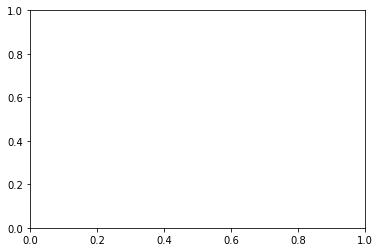

In [101]:
# Plot the data
f, ax=plt.subplots()
band_1.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()